In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [3]:
#Two column numpy array, only need the first column with the rating
ratings = data.text.str.extract('(\d+(\.\d+)?)/10', expand=False)[0] 
#Numpy array into pandas dataframe
frame = pd.DataFrame(ratings)
frame.columns = ['ratings']

In [4]:
data = pd.merge(data, frame, right_index=True, left_index=True)

In [5]:
data = data[data.notnull()['ratings']]

In [6]:
#ratings is a string, convert it to float
data['ratings'] = data['ratings'].apply(pd.to_numeric)
data = data[data.ratings < 15]

In [7]:
def to_timestamp(dateObject):
    return dateObject.timestamp()

In [8]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [9]:
import matplotlib.pyplot as plt

In [10]:
from scipy import stats

In [11]:
fit = stats.linregress(data['timestamp'], data['ratings'])

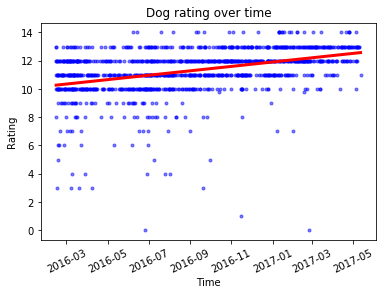

In [12]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['ratings'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.title('Dog rating over time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.savefig('dog-rates-result.png')
plt.show()